<a href="https://colab.research.google.com/github/BreyeFoka/ai-projects-with-python-tensorflow-and-nltk/blob/master/Deep-Learning/MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN to classify handwritten digits
----

### Importing Tensorflow and MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Other Libraries
import numpy as np

#Plot Paramenters
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

##### Importing MNIST Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Dataset size
print("Training Data Shape \t: X : ",X_train.shape, " y : ",y_train.shape)
print("Test Data Shape \t: X : ",X_test.shape, " y : ",y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Data Shape 	: X :  (60000, 28, 28)  y :  (60000,)
Test Data Shape 	: X :  (10000, 28, 28)  y :  (10000,)


Thus, we have total of 70,000 28X28 pixels images, of which 60,000 are in training set and rest 10,000 in test data set

### Preview Few Random Images
-------


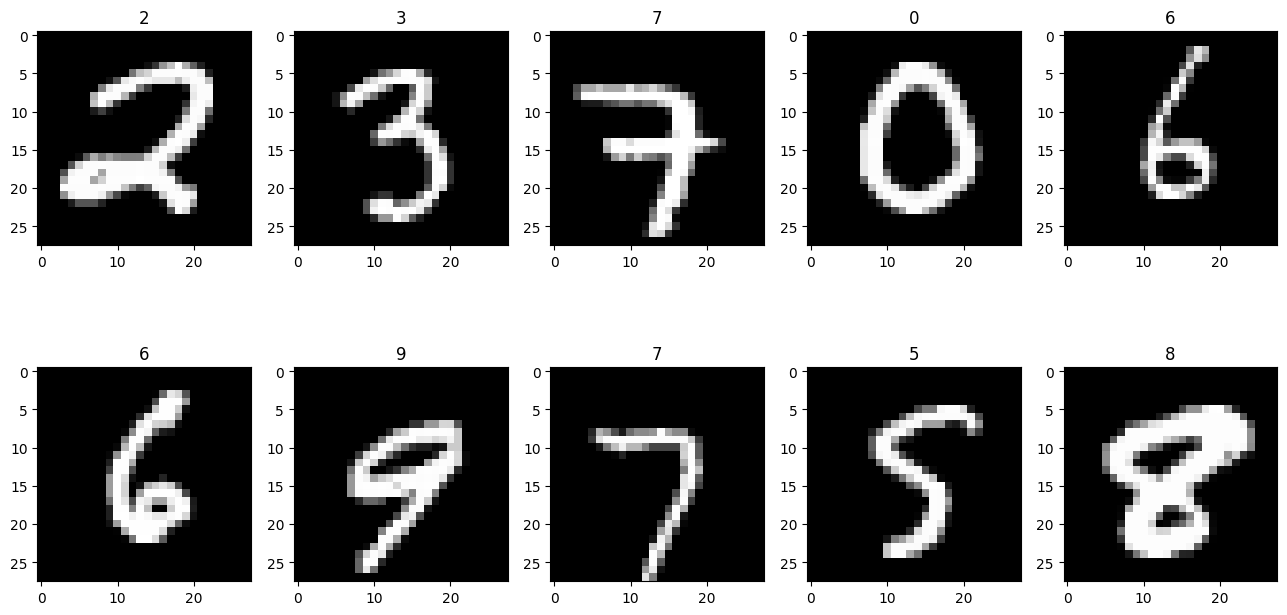

In [3]:
rand_arr = np.random.randint(low=1,high=len(X_train),size=(10,))
for i in range(0,len(rand_arr)):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[rand_arr[i]],cmap=plt.get_cmap('gray'))
  plt.title(y_train[rand_arr[i]])

#### Preprocess Data

In [4]:
#One-hot encode the y variable
y_train  = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

#Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

# Creating a Shallow Neural Network Model

In [5]:
shallow_model = tf.keras.models.Sequential()
shallow_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
shallow_model.add(tf.keras.layers.Dense(128,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
shallow_model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#Compile the Model
shallow_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

%time history = shallow_model.fit(X_train,y_train,validation_split=0.166,epochs=30,batch_size=10)

Epoch 1/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8451 - loss: 0.7556 - val_accuracy: 0.9161 - val_loss: 0.4184
Epoch 2/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9120 - loss: 0.4238 - val_accuracy: 0.9291 - val_loss: 0.3688
Epoch 3/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9223 - loss: 0.3843 - val_accuracy: 0.9334 - val_loss: 0.3456
Epoch 4/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9304 - loss: 0.3551 - val_accuracy: 0.9357 - val_loss: 0.3344
Epoch 5/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9340 - loss: 0.3366 - val_accuracy: 0.9275 - val_loss: 0.3486
Epoch 6/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9394 - loss: 0.3230 - val_accuracy: 0.9501 - val_loss: 0.2887
Epoch 7/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9421 - loss: 0.3094 - val_accuracy: 0.9513 - val_loss: 0.2885
Epoch 8/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9450 - loss: 0.2

In [7]:
score, acc = shallow_model.evaluate(X_test,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9551 - loss: 0.2367
Test Score :  0.21975643932819366
Test Accuracy :  96.06 %


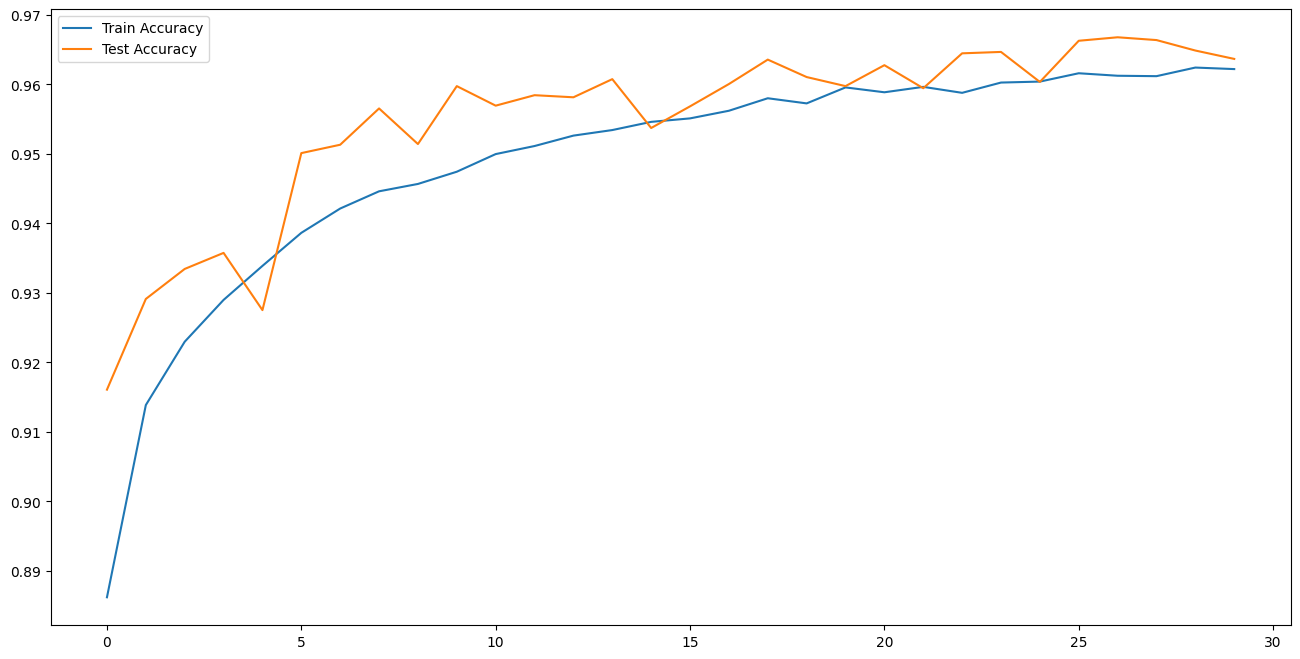

In [8]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

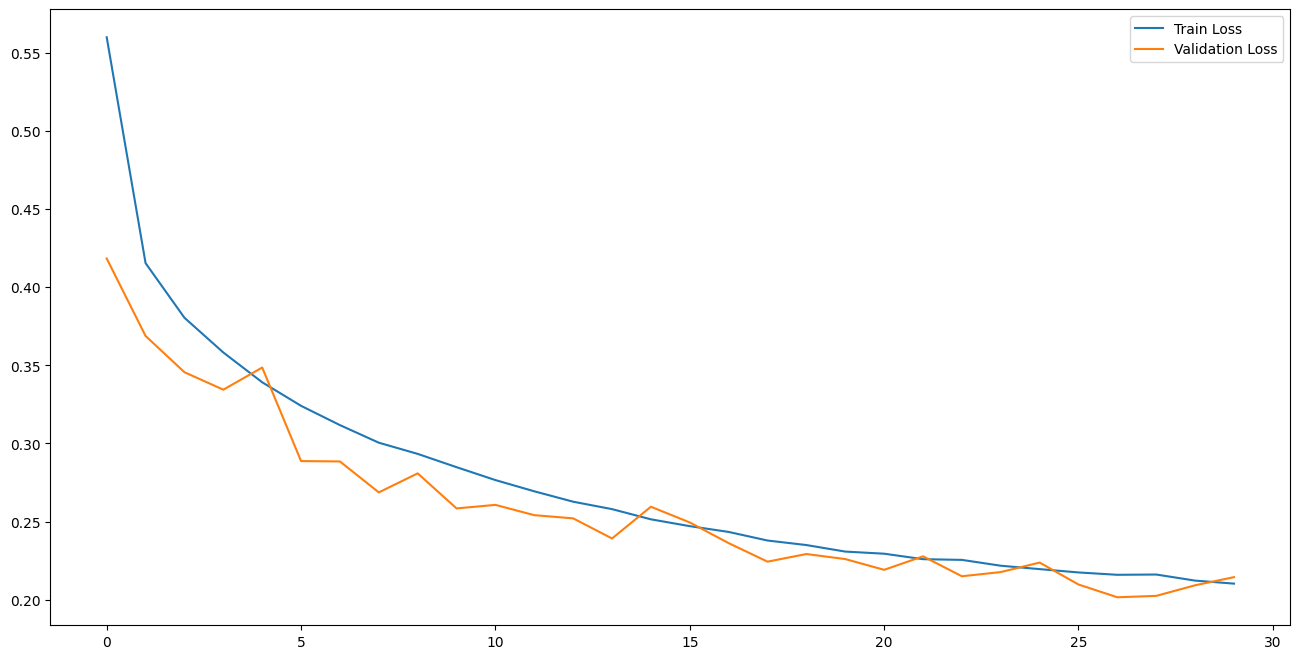

In [9]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

# Convolution Neural Network
-------

In [10]:
trainx = X_train.reshape(X_train.shape[0],28,28,1)
testx = X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(60,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
%time history = model.fit(trainx,y_train,validation_split=0.166,epochs=20,batch_size=20)

Epoch 1/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8816 - loss: 0.3591 - val_accuracy: 0.9838 - val_loss: 0.0613
Epoch 2/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9811 - loss: 0.0661 - val_accuracy: 0.9899 - val_loss: 0.0369
Epoch 3/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9866 - loss: 0.0516 - val_accuracy: 0.9890 - val_loss: 0.0466
Epoch 4/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9893 - loss: 0.0373 - val_accuracy: 0.9869 - val_loss: 0.0518
Epoch 5/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9903 - loss: 0.0357 - val_accuracy: 0.9900 - val_loss: 0.0434
Epoch 6/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9917 - loss: 0.0330 - val_accuracy: 0.9838 - val_loss: 0.0712
Epoch 7/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9924 - loss: 0.0299 - val_accuracy: 0.9889 - val_loss: 0.0562
Epoch 8/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9927 - loss: 0.02

In [14]:
score, acc = model.evaluate(testx,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0717
Test Score :  0.057551898062229156
Test Accuracy :  98.92 %


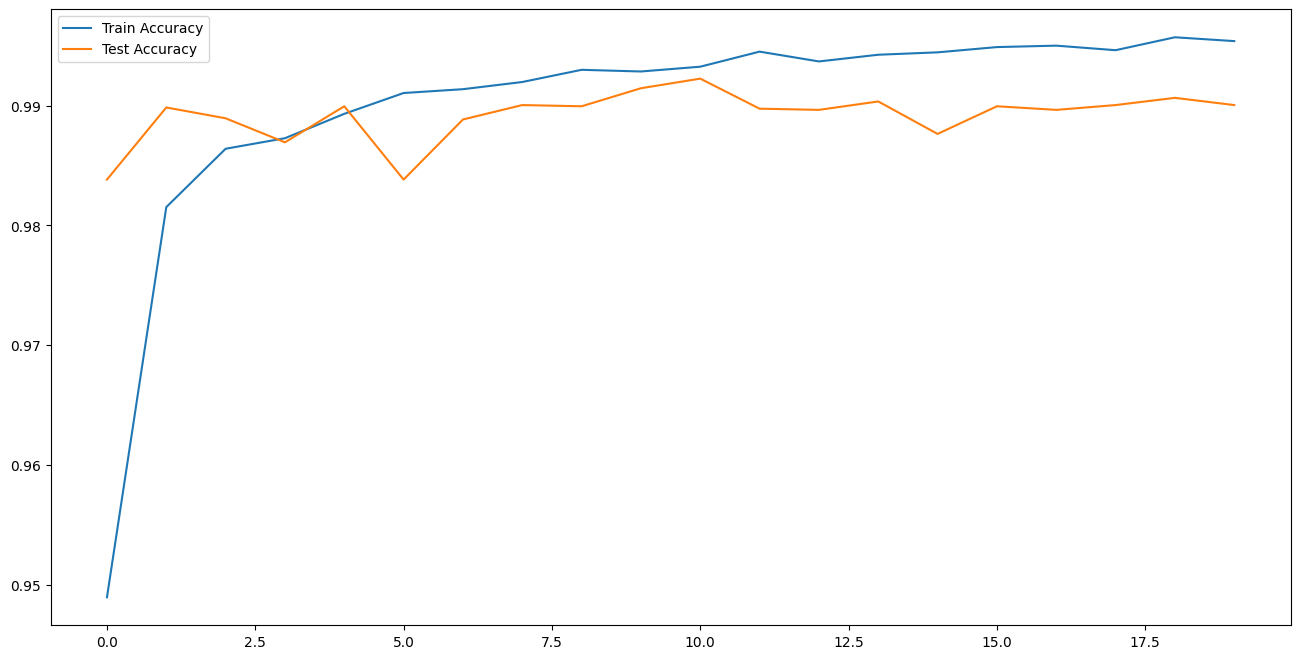

In [15]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

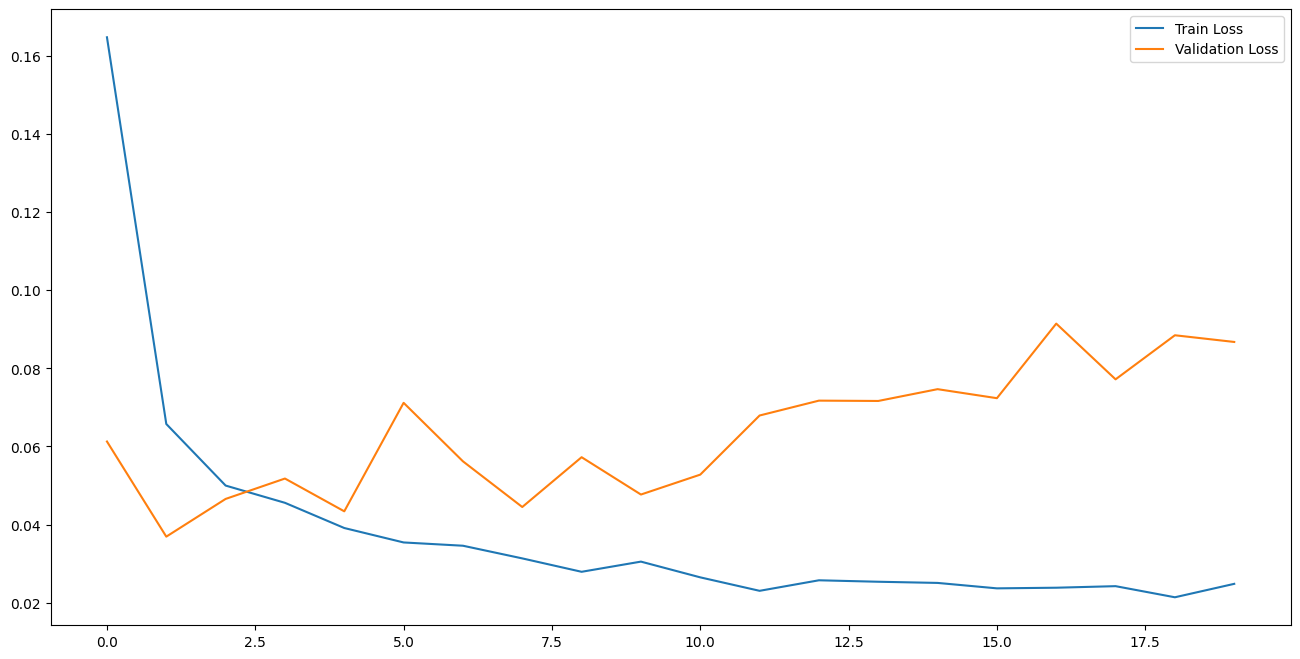

In [16]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


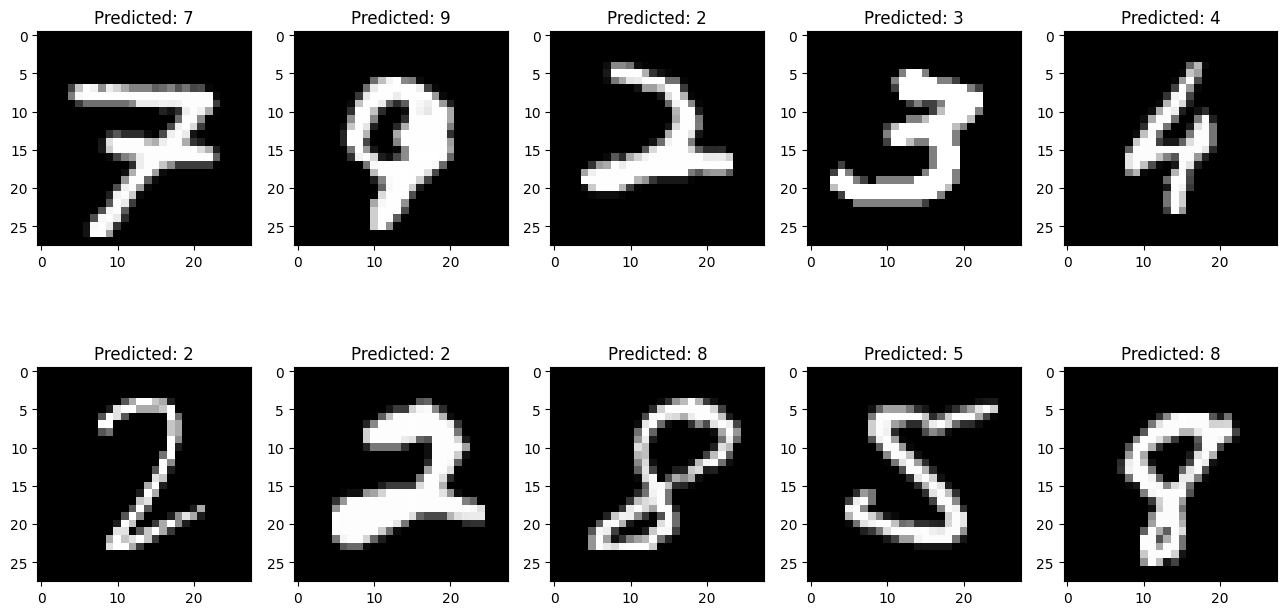

In [17]:
# prompt: make the model predict a random number inside the dataset

import random

# Assuming 'X_test' and 'y_test' are defined from the provided code.


prediction_images=[]
prediction_titles=[]
predicted=[]
for i in range(10):
  random_index=random.randint(0, len(X_test)-1)
  random_image=X_test[random_index]
  random_label=y_test[random_index]
  prediction_images.append(random_image)
  prediction_titles.append(np.argmax(random_label))


# Use your model to predict

for prediction in prediction_images:
  prediction = prediction.reshape(1, 28, 28, 1)

for i in range(10):
  prediction = model.predict(prediction_images[i].reshape(1, 28, 28, 1))
  predicted.append(np.argmax(prediction))

for i in range(10):
  plt.subplot(2,5,1+i)
  plt.imshow(prediction_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: "+str(predicted[i]))

In [18]:
model.save('handwritten_digits_cnn.h5')